# Исследование объявлений о продаже квартир

# Оглавление   
[1 Описание проекта](#description)   
- [1.1 Описание данных](#data)    

[2 Загрузка и изучение данных](#downloading)    
- [2.1  Выводы по разделу](#conclusion1)

[3  Предобработка данных](#preparing)    
- [3.1  Пропуски значений в столбцах](#isna)    
- [3.2  Поиск аномальных значенний](#anomaly)    
- [3.3  Преобразование типов данных](#tranformation)    
- [3.4  Выводы по разделу](#conclusion2)

[4  Внесение расчёнтых и категорийных данных](#calculation)    
- [4.1  Выводы по разделу](#conclusion3)

[5  Исследовательский анализ данных](#research)   
- [5.1  Общая площадь](#total_area)   
- [5.2  Жилая площадь](#living_area)  
- [5.3  Площадь кухни](#kitchen_area)  
- [5.4  Цена объекта](#price)   
- [5.5  Количество комнат](#rooms)   
- [5.6  Высота потолков](#ceil)   
- [5.7  Этаж квартиры](#floor)    
- [5.8  Тип этажа квартиры](#floor_type)    
- [5.9  Общее количество этажей в доме](#total_floors)    
- [5.10  Расстояние до центра города в метрах](#distance)    
- [5.11  Расстояние до ближайшего аэропорта](#airport_distance)    
- [5.12  Расстояние до ближайшего парка](#park_distance)    
- [5.13  День публикации объявления](#weekday)    
- [5.14  Месяц публикации объявления](#month)    
- [5.15  Сроки продажи квартир](#days)    
- [5.16  Зависимость цены от общей площади](#price_to_area)      
- [5.17  Зависимость цены от жилой площади](#price_to_living_area)   
- [5.18  Зависимость цены от площади кухни](#price_to_kitchen)   
- [5.19  Зависимость цены от количества комнат](#price_to_rooms)     
- [5.20  Зависимость цены от типа этажа](#price_to_floor)     
- [5.21  Зависимость цены от дня недели](#price_to_weekday)     
- [5.22  Зависимость цены от месяца размещения](#price_to_month)     
- [5.23  Зависимость цены от года размещения](#price_to_year)     
- [5.24  Средняя цена в 10 населённых пунктах с самым большим числом объявлений](#mean_price)     
- [5.25  Средняя цена каждого километра](#price_to_distance)     
- [5.26  Выводы по разделу](#conclusion4)

[6  Результаты исследования](#result)    

### Описание проекта <a id='description'></a>
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Выполним предобработку данных и изучим их. Найдём интересные особенности и зависимости, которые существуют на рынке недвижимости.

#### Описание данных <a id='data'></a>
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Загрузка и изучение данных <a id='downloading'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
    
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

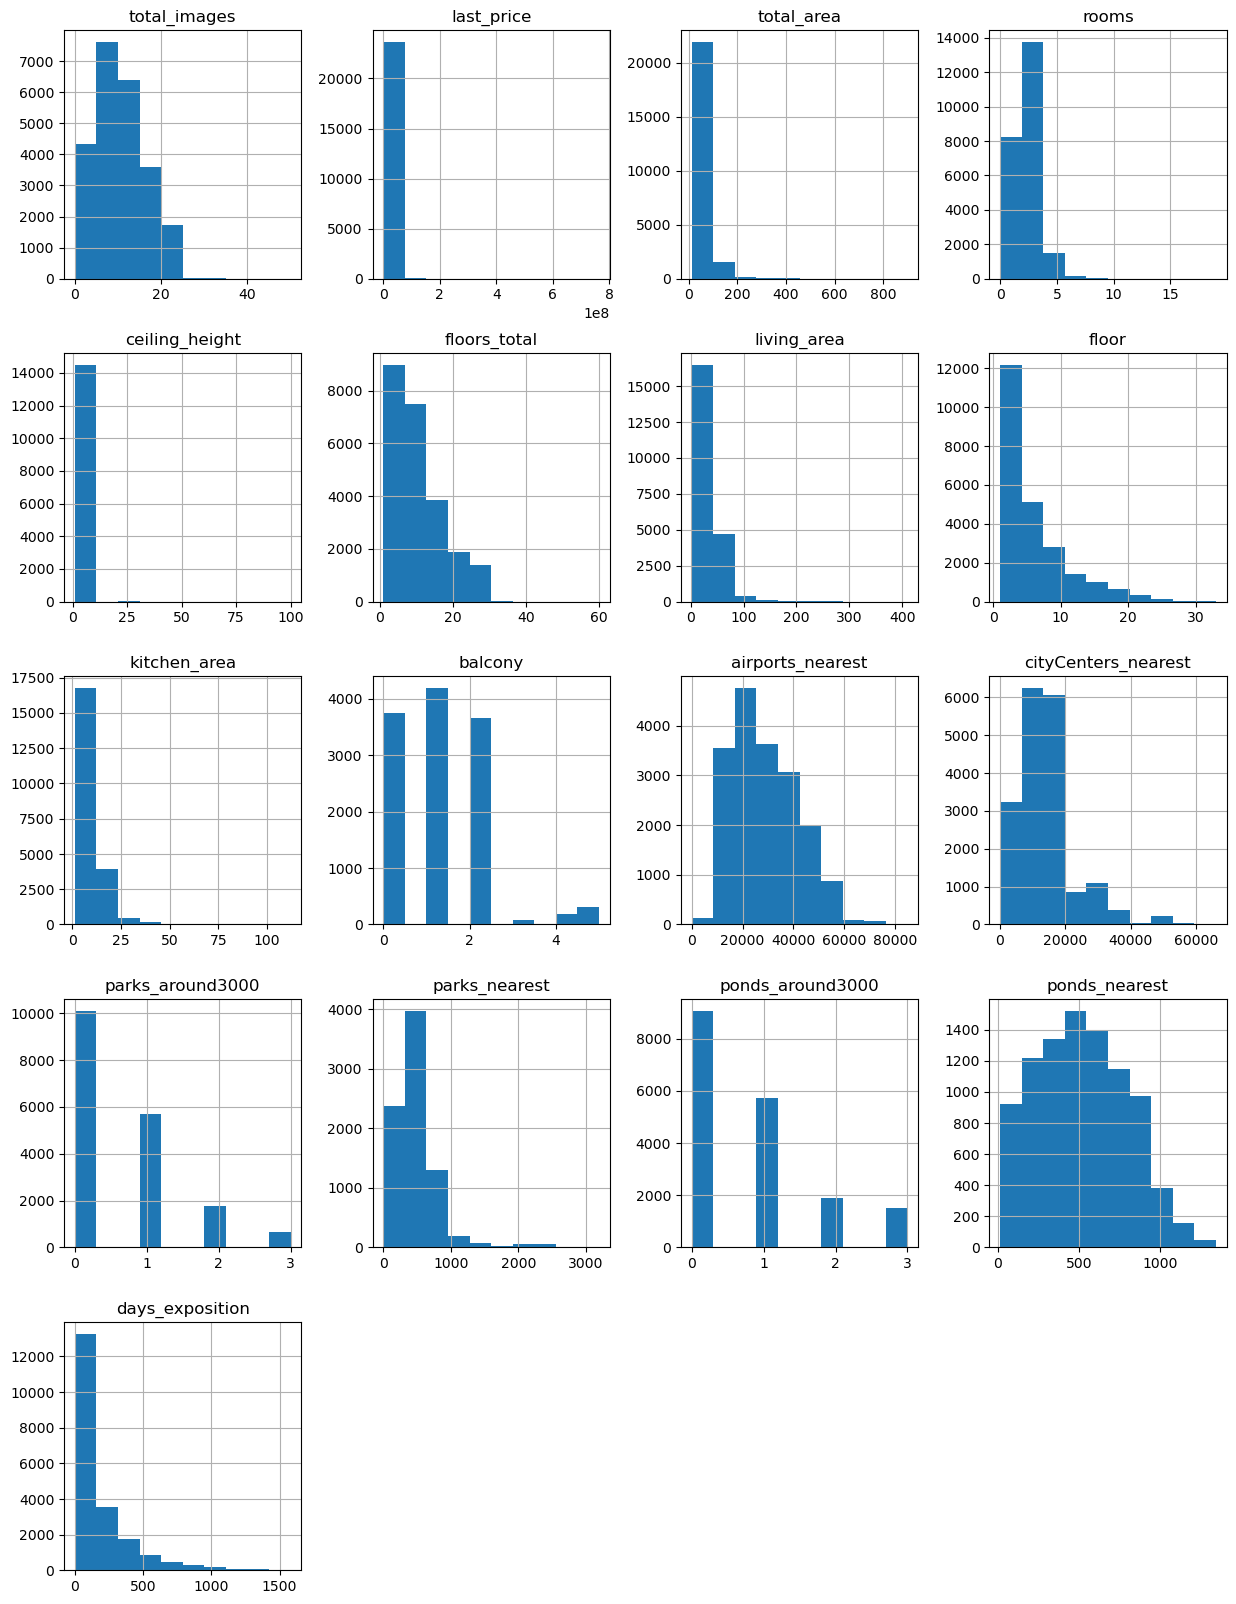

In [4]:
data_isnum = pd.DataFrame()
for column in data.columns:
    if data[column].dtypes == 'float64' or data[column].dtypes == 'int64':
        data_isnum[column] = data[column]
data_isnum.hist(figsize=(15, 20));

#### Вывод: <a id='conclusion1'></a>
Предоставленные данные обладают достаточно большой выборкой для проведения исследования. В данных присутствуют пропуски, которые предстоит обработать. Вид некоторых графиков может объясняться наличием аномальных значений, попробуем их найти и отфильтровать.

### Предобработка данных <a id='preparing'></a>

#### Пропуски значений в столбцах <a id='isna'></a>

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце с количеством балконов пропущены значения, скорее всего это связано с отсутствием балконов в этих квартирах, заменим пропущенные значения на 0. Так же отсутствие прудов и парков в радиусе трёх километров объясняет наличие пропусков в столбцах `parks_around3000` и `ponds_around3000`, пропуски в данных столбцах заменим нулями.

In [6]:
data['balcony'] = data['balcony'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

Изучим уникальные значения в столбце `is_apartment`.

In [7]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

В столбце много пропусков, но аппартаменты редкий тип недвижимости, по этому отсутствие значения для данного типа подразумевает, что недвижимость не является аппартаментами. Заменим пропущенные значения на `False`.

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Графики с расстояниями до центра города `cityCenters_nearest` и аэропорта `airports_nearest` показывают реалистичное распределение с учётом размеров региона, но количество пропусков в выборке составляет примерно 25% и заполнение их медианным значением исказит картину распределения, поэтому оставим пропущенные значения в этих столбцах. 

Столбец `days_exposition` содержит информацию о том, сколько дней было размещено объявление (от публикации до снятия), пропуски в нём означают, что недвижимость ещё не продана, по этому пропущенные значения здесь оставим.

#### Поиск аномальных значенний. <a id='anomaly'></a>

В столбце с высотой потолков `ceiling_height` значительное количество пропусков, но основная часть данных находится в небольшом диапазоне. Если отбросить аномальные значения, то можно будет вычислить хорошее медианное значение и заполнить с его помощью пропущенные данные. Изучим как распределяются значения в этом столбце.

In [9]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Средее и медианное значение мало отличаются, но максимальное значение сильно выбивается, вероятно из-за ошибки в данных.
Посмотрим уникальные значения в два раза больше третьего квартиля.

In [10]:
display(data[data['ceiling_height'] > 5.6]['ceiling_height'].unique())

array([ 25. ,  32. ,   8. ,  27. ,  24. ,  26. ,   8.3,  14. ,  20. ,
         6. ,  22.6,   5.8,  27.5,  10.3, 100. ])

Похоже не верно указана целая часть вещественного числа. Для начений больше 20 уменьшим целую часть на один порядок, после чего уберем аномальные занчения меньше двух метров и больше четырёх.

In [11]:
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] = data['ceiling_height'] / 10
good_data = data[((data['ceiling_height'] <= 4) & (data['ceiling_height'] >= 2)) | (data['ceiling_height'].isna() == True)]

Посмотрим как распределились значения количества дней размещения объявления `days_exposition`.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

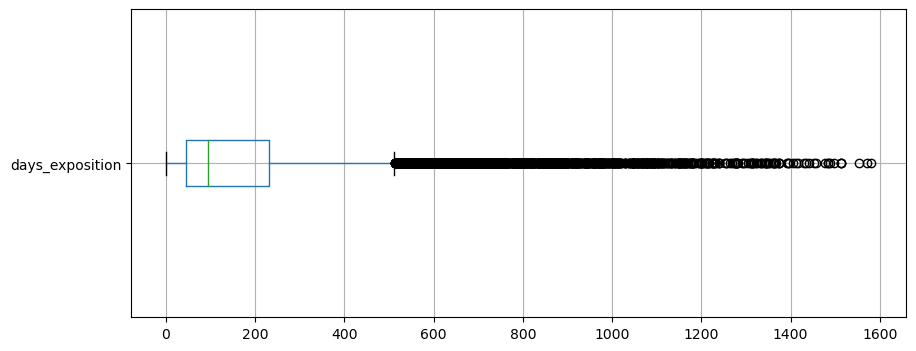

In [12]:
display(data['days_exposition'].describe())
data.boxplot(column='days_exposition', vert=False, figsize=(10, 4));

Выборка характеризуется большим разбросом значений, многие из которых значительно отличаются от медианного, увеличивая среднее значение. Для дальнейшего изучения этих данных на графике, уберем аномально долгие объявления с величной в четыре раза превышающей третий квартиль. В данной категории пропущенные значения составляют около 14% выборки заполним пропущенные значения медианными.

In [13]:
good_data = good_data[(good_data['days_exposition'] <= 930) | (good_data['days_exposition'].isna() == True)]

Графики с информацией о парках и прудах: `parks_nearest`, `ponds_nearest`, показывают равномерное распределение значений, без больших выбросов. Имеющиеся данные выглядят вполне реальными, но по ним мы не сможем заполнить пропуски медианными значениями,поскольку пропуски в данных выборках составляют значительный процент, доходя до 75%. Удалить их мы также не можем из-за потери значительной части данных.

В столбце `total_images` пропуски отсутствуют, данные на графике сразу показывают картину распределения значений: в среднем продавцы выкладывают около десяти фотографий, больше 25 фотографий объекта недвижимости это уже редкость.

Изучим есть ли аномалии в распределении данных по числу этажей `floors_total`.

In [14]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Максимальное количество этажей доходит до 60, таких небоскрёбов в регионе не много, посмотрим какие объекты есть с этажностью больше 40.

In [15]:
data[data['floors_total'] > 40]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,False,False,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,False,False,False,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


всего два объекта с количеством этажей больше 40, похоже на ошибку при вводе данных: для Кронштадта количество этажей 6, а не 60, а в Санкт-Петербурге 25, а не 52. Исправим значения.

In [16]:
data.loc[data['floors_total'] == 60, 'floors_total'] = 6
data.loc[data['floors_total'] == 52, 'floors_total'] = 25

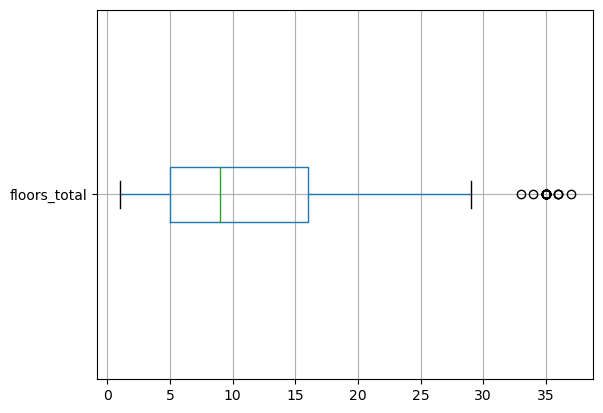

In [17]:
data.boxplot(column='floors_total', vert=False);

In [18]:
good_data = good_data[(good_data['floors_total'] <= 30) | (good_data['floors_total'].isna() == True)]

Гистограмма столбца `floor` показывает более равномерное распределение значений, посмотрим, есть ли там аномалии. 

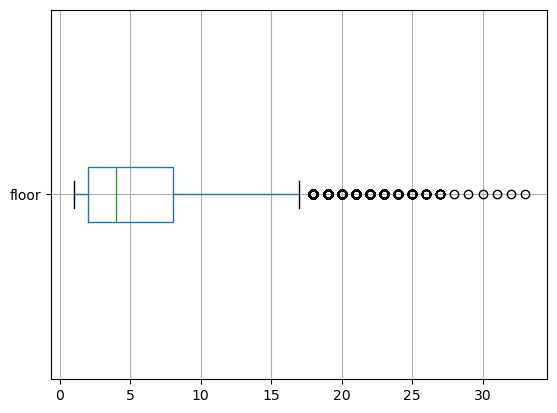

In [19]:
data.boxplot(column='floor', vert=False);

Значения до 30 выходят за пределы третьего квартиля, но их всё же довольно много, оставим их, чтобы не потерят статистику. Выше тридцатого этажа наблюдаются единичные значения, будем считать их аномальными и уберём из выборки.

In [20]:
good_data = good_data[good_data['floor'] <= 30]

Посмотрим аномальные данные для площади кухни

In [21]:
good_data['kitchen_area'].describe()

count    21003.000000
mean        10.514183
std          5.821920
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

В данных наблюдается экстремально большие значения, учитывая большие размероы кухонь в элитном жилье, посмотрим количество значений в шесть раз больше третьего квартиля.

In [22]:
good_data[good_data['kitchen_area'] > 72]['kitchen_area'].count()

9

Площадь кухни больше 72 метров квадратных встречается в двадцати случаях, такое количество может говорить об ошибке внесения данных, вероятно была пропущена точка после целой части. Разделим экстремальные значения на 10.

In [23]:
good_data.loc[good_data['kitchen_area'] > 72, 'kitchen_area'] = good_data['kitchen_area'] / 10

good_data = good_data[((good_data['kitchen_area'] < 24) & (good_data['kitchen_area'] > 2)) | \
                      (good_data['kitchen_area'].isna() == True)]

Теперь изучим аномалии в данных по жилой площади.

In [24]:
display(data['living_area'].describe())

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

В данных наблюдаются значения меньше шести квадратных метров, такие значения жилой площади мало вероятны, посмотрим их количество.

In [25]:
data[data['living_area'] < 6]['living_area'].count()

6

таких значений не много, видимо они связаны с ошибками при вводе, заменим эти значения расчётными из общей площади и площади кухни, и если они всё же будут меньше 6 метров квадратных, то удалим их.

In [26]:
good_data.loc[good_data['living_area'] < 6, 'living_area'] = good_data['total_area'] - good_data['kitchen_area']
good_data = good_data[(good_data['living_area'] >= 6) | (good_data['living_area'].isna() == True)]

good_data = good_data[((good_data['living_area'] < 120) & (good_data['living_area'] > 8)) | \
                      (good_data['living_area'].isna() == True)]

Пропуски в столбце `last_price` со стоимостью жилья отсутствуют, посмотрим как распределяются значения.

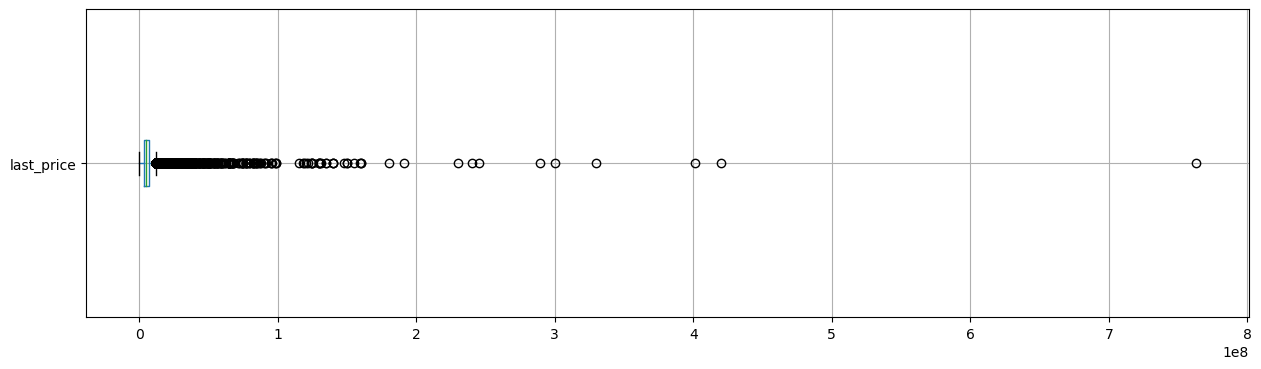

In [27]:
data.boxplot(column='last_price', vert=False, figsize=(15, 4));

Наблюдается большой разброс значений, значительно отличающихся от среднего. Посмотрим медиану и уберём аномалии.

In [28]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Разброс данных составляет два порядка относительно среднего значения, но после величины, в два раза большей третьего квартиля, наблюдаются только отдельные всплески довольно большой величины, относительно среднего. Эти значения будем считать аномальными и уберём, чтобы уменьшить влияние на среднее значение по данной категории.

In [29]:
good_data = good_data.query('last_price < 12500000')

Изучим аномалии в столбце `rooms` с количеством комнат.

In [30]:
display(data['rooms'].unique())

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

В данных присутствуют квартиры со количеством комнат равным нулю, рассмотрим небольшой срез таких объектов.

In [31]:
data[data['rooms'] == 0].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,False,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,False,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,False,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,False,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.00,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,0.0,NaN,0.0,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.00,7,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,483.0


В общих чертах остальные данные таких объектов выглядят реальными и подходят под категорию однокомнатных квартир, поэтому присвоим квартирам с количеством комнат 0, значение 1.

In [32]:
good_data.loc[good_data['rooms'] == 0, 'rooms'] = 1
good_data['rooms'].unique()

array([1, 2, 3, 4, 6, 5, 7], dtype=int64)

Гистограмм для столбца `rooms` показывает что чаще встречается недвижимость с небольшим количеством комнат, посмотрим распределение значений подробнее.

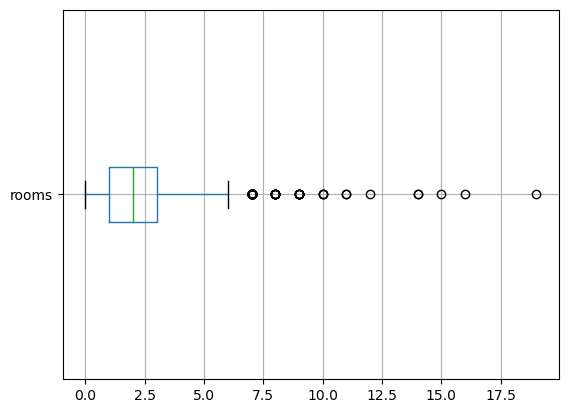

In [33]:
data.boxplot(column='rooms', vert=False);

Недвижимость у которой больше семи комнат остаётся в хвосте аномальных значений, уберём их, чтобы подробнее рассматривать основные значения.

In [34]:
good_data = good_data.query('rooms < 7')

График с общей площадью объекта `total_area` отображает наличие значений, на много превышающих среденее. Посмотрим подробнее, как они распределены и какие в них могут быть аномалии.

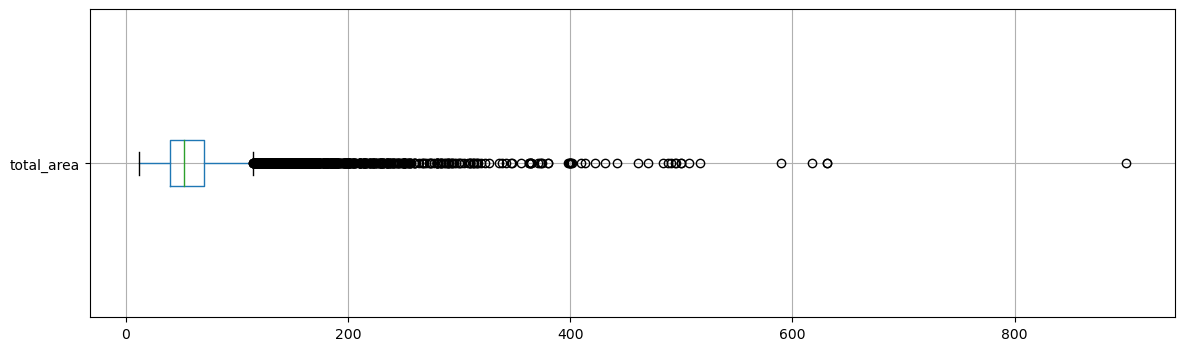

In [35]:
data.boxplot(column='total_area', vert=False, figsize=(14,4));

После площади в 400 квадратных метров прослеживаются отдельные всплески значений, посмотрим с чем они связаны, возможно это ошибки ввода данных. Посмотрим медианную стоимость этих объектов.

In [36]:
data[data['total_area'] > 400]['last_price'].median()

91075000.0

Похоже это действительно большие и дорогие объекты недвижимости, ошибок ввода данных там нет. Посмотрим, сколько объектов с площадью больше 200 метров квадратных.

In [37]:
data[data['total_area'] > 200]['last_price'].count()

227

Таких значений менее двухсот пятидесяти, будем считать их экстремальными и уберем из выборки вместе с подозрительно низкими значениями - меньше 10 квадратных метров.

In [38]:
good_data = good_data.query('10 < total_area < 200')

#### Поиск дубликатов. <a id='duplicate'></a>

Проверим названия населённых пунктов `locality_name` на наличие неявных дубликатов.

In [39]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Неявные дубликаты в выборке связаны с обозначением типа населённого пункта. Чтобы устранить такие дубликаты создадим функцию, которая отфильтрует тип населенного пункта и оставит только название.

In [40]:
def locality_rename(row):
    row = str(row)
    
    if 'посёлок' in row:
        row = row.replace('посёлок ', '')
        
    if 'поселок ' in row:
        row = row.replace('поселок ', '')
        
    if 'городской ' in row:
        row = row.replace('городской ', '')
    elif 'городского типа ' in row:
        row = row.replace('городского типа ', '')
    elif 'станции ' in row:
        row = row.replace('станции ', '')
    elif 'при железнодорожной станции ' in row:
        row = row.replace('при железнодорожной станции ', '')
    elif 'при станции ' in row:
        row = row.replace('при станции ', '')
    elif 'деревня ' in row:
        row = row.replace('деревня ', '')

    return row

In [41]:
good_data['locality_name'] = data['locality_name'].apply(locality_rename)

Пропущенные значения столбцов `ceiling_height`, `living_area`, `kitchen_area` и `floors_total` заменим медианными значениями для их населенного пункта, а в случае, если медиану по населенному пункту сформировать не удастся, присвоим медианное значение по всему дата фрейму, поскольку основная часть выборки имеет маленьки разброс и это не исказит татистику. Если значение в столбце `floors_total` будет меньше значения столбца `floor`, того же объекта, то присвоим столбцу `floors_total` значение `floor`.

In [42]:
for target_column in ['ceiling_height', 'floors_total', 'living_area', 'kitchen_area']:
    for t in good_data['locality_name'].unique():
        good_data.loc[(good_data['locality_name'] == t) & (good_data[target_column].isna()), target_column] = \
        good_data.loc[(good_data['locality_name'] == t), target_column].median()

for target_column in ['ceiling_height', 'floors_total', 'living_area', 'kitchen_area']:
    good_data.loc[good_data[target_column].isna() == True, target_column] = good_data[target_column].median()

good_data.loc[good_data['floors_total'] < good_data['floor'], 'floors_total'] = good_data['floor']

#### Преобразование типов данных <a id='transformation'></a>

Преобразуем типы данных в столбцах `balcony`,`floor`, `floors_total`, `parks_around3000`, `ponds_around3000` в целочисленный формат, дробные значений в них быть не может. В столбце `is_apartment` значения бывают только истинными или ложными, по этому привём их к типу данных `bool`. Для далнейшего подробного анализа данных о продажах нам понадобится отслеживать временные промежутки, для этого приведём данные столбца `first_day_exposition` к формату `datetime`

In [43]:
for col in ['balcony', 'floors_total', 'floor', 'parks_around3000', 'ponds_around3000']:
    good_data[col] = good_data[col].astype('int32')

good_data['is_apartment'] = good_data['is_apartment'].astype('bool')
good_data['first_day_exposition'] = pd.to_datetime(good_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [44]:
good_data = good_data.reset_index(drop=True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21230 entries, 0 to 21229
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21230 non-null  int64         
 1   last_price            21230 non-null  float64       
 2   total_area            21230 non-null  float64       
 3   first_day_exposition  21230 non-null  datetime64[ns]
 4   rooms                 21230 non-null  int64         
 5   ceiling_height        21230 non-null  float64       
 6   floors_total          21230 non-null  int32         
 7   living_area           21230 non-null  float64       
 8   floor                 21230 non-null  int32         
 9   is_apartment          21230 non-null  bool          
 10  studio                21230 non-null  bool          
 11  open_plan             21230 non-null  bool          
 12  kitchen_area          21230 non-null  float64       
 13  balcony         

#### Вывод: <a id='conclusion2'></a>
Очищенные данные выглядят репрезентативными. Данные в столбцах с количеством балконов, парков, прудов, этажей в доме и этажа, на котором находится объект недвижимости преобразованы в целочисленный тип, а данные столбца `days_exposition` преобразованы в формат "datetime", а `is_apartment` в "bool". Теперь типы данных соответствуют значениям в выборке и готовы к дальнейшей обработке. Были обнаружены и устранены неявные дубликаты в столбце с названиями населённых пунктов, причиной которых была путаница в обозначении типа населённого пункта. В столбцах со стоймостью и общей площадью наблюдалось большое количество аномально больших значений, связанных, вероятно, с элитным жильём. Пропуски часто были связаны с отсутствием у продавца необходимой картографической и технической информации, а также с ошибками при вводе информации. Не удалось восстановить большое количество пропущенных значений расстояний до центра и аэропорта, поскольку во многих населённых пунктах эти параметры не указаны, а заполнение пропусков по медианному значению для всего региона внесёт сильное искажение в картину, т.к. многие из этих населенных пунктов могут находятся на значительном расстоянии от медианного значения. Пропуски остались и в столбце `days_exposition`, они указывают на то, что недвижимость ещё не продана и не вносят искажения в статистику.

### Внесение расчёнтых и категорийных данных <a id='calculation'></a>

Рассчитаем цену одного квадратного метра и добавим в столбец `sqm_price`. Добавим день недели публикации объявления в столбец `weekday_exposition`.
Добавим месяц публикации в столбец `month_exposition`.
Добавим год публикации в столбец `year_exposition`.

In [45]:
good_data['sqm_price'] = good_data['last_price'] / good_data['total_area']
good_data['weekday_exposition'] = good_data['first_day_exposition'].dt.weekday
good_data['month_exposition'] = good_data['first_day_exposition'].dt.month
good_data['year_exposition'] = good_data['first_day_exposition'].dt.year

Сделаем функцию для определения типа этажа квартиры.

In [46]:
def floor_sorter(row):
    try:
        if row['floor'] == row['floors_total']:
            return 'последний'
        elif row['floor'] == 1:
            return 'первый'
        else:
            return 'другой'
    except:
        return 'другой'

Добавим столбец `floor_type` с типом этажа квартиры, расчитанным функцией floor_sorter() и столбец `center_distance_km` c
расстоянием до центра города в километрах.

In [47]:
good_data['floor_type'] = good_data.apply(floor_sorter, axis=1)
good_data['center_distance_km'] = good_data['cityCenters_nearest'] / 1000
good_data['center_distance_km'] = np.round(good_data['center_distance_km'], decimals=0)
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday_exposition,month_exposition,year_exposition,floor_type,center_distance_km
0,7,3350000.0,40.4,2018-12-04,1,2.630,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
1,10,5196000.0,56.0,2015-08-20,2,2.650,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
2,10,2890000.0,30.4,2018-09-10,1,2.650,12,14.4,5,False,False,False,9.1,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,NaN
3,6,3700000.0,37.3,2017-11-02,1,2.625,26,10.6,6,False,False,False,14.4,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3,11,2017,другой,19.0
4,5,7915000.0,71.6,2019-04-18,2,2.650,24,30.0,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой,12.0


#### Вывод: <a id='conclusion3'></a>
Данные подготовлены для дальнейшего подробного исследования: добалены столбцы ценой квадратного метра, днём, месяцем и годом размещения объявления, расстоянием до центра и типом этажа.

### Исследовательский анализ данных <a id='research'></a>

#### Общая площадь <a id='total_area'></a>

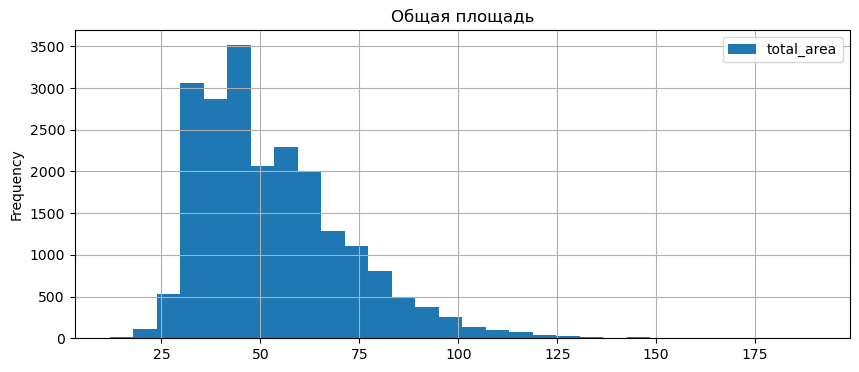

In [48]:
good_data['total_area'].plot(kind='hist', grid=True, legend=True, bins=30, figsize=(10, 4))
plt.title('Общая площадь')
plt.show()

Чаще всего встречаются объекты с общей площадью до 50 метров квадратных, похоже это сегмент студий, однокомнатных и маленьких двухкомнатных квартир. Большая активность в данном сегменте объясняется доступностью стоимости жилья и его привлекательности в качестве инвестиционного вложения. Дальнейший рост площади сопровождается уменьшением количество объявлений.

#### Жилая площадь <a id='living_area'></a>

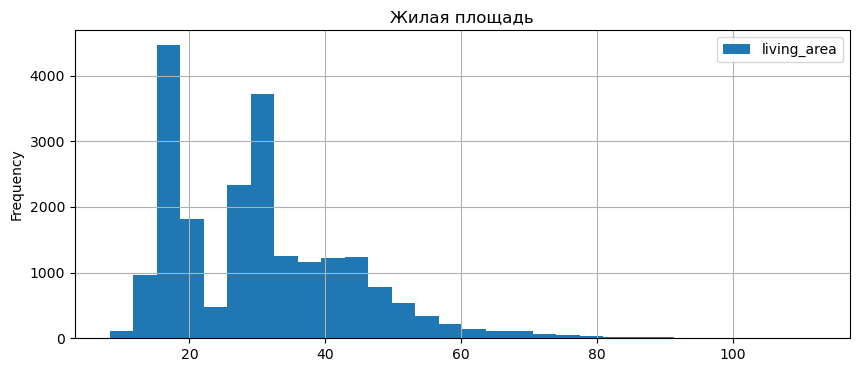

In [49]:
good_data['living_area'].plot(kind='hist', grid=True, legend=True, bins=30, figsize=(10, 4))
plt.title('Жилая площадь')
plt.show()

В жилой площади чаще выделяются два сектора: от 15 до 20 метров квадратных и около 30 метров квадратных. Возможно это связано с нормативами типового строительства и так разделяется жилая площадь студий и однокомнатных квартир. Далее врайоне 40 квадратных метров наблюдается плато, в которое попадают большие однокомнатные квартиры и маленькие двухкомнатные, после чего с ростом площади наблюдается постепенный спад частоты объявлений.

#### Площадь кухни <a id='kitchen_area'></a>

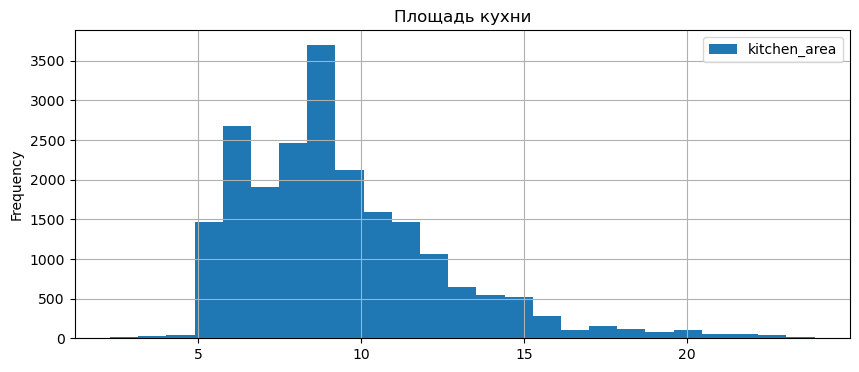

In [50]:
good_data['kitchen_area'].plot(kind='hist', grid=True, legend=True, bins=25, figsize=(10, 4))
plt.title('Площадь кухни')
plt.show()

Чаще всего значения площади кухни находятся в диапазоне от 6 до 10 метров квадратных, похоже, с точки зрения строительных норм и эргономики, такие размеры считаются оптимальными, дальнейший рост площади кухни сопровождается уменьшением числа предложений.

#### Цена объекта <a id='price'></a>

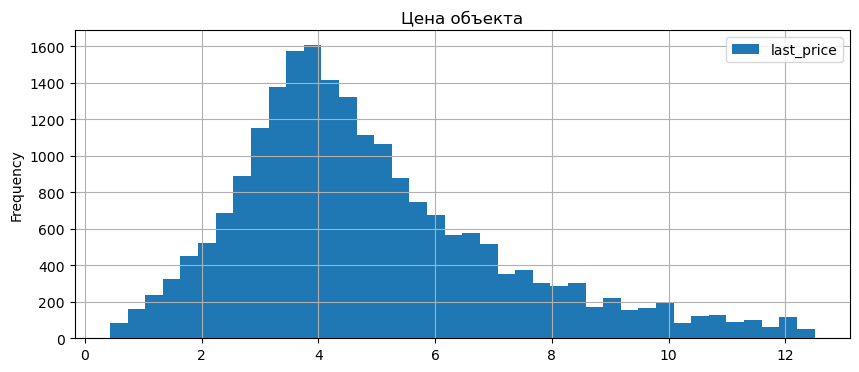

In [51]:
(good_data['last_price'] / 1000000).plot(kind='hist', grid=True, legend=True, bins=40, figsize=(10, 4))
plt.title('Цена объекта')
plt.show()

Наиболее распространённый диапазон цен в объявлениях от 3 до 5 миллионов, поскольку в него входят и объекты с небольшой площадью, и объекты большой площади, удалённые от центра. Такие цены распространенны и в сегменте инвестиционных объектов.

#### Количество комнат <a id='rooms'></a>

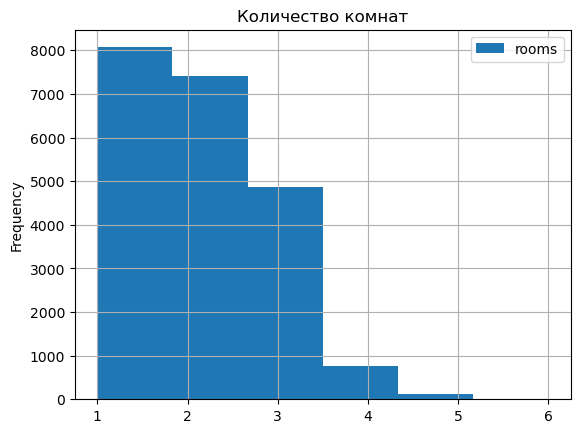

In [52]:
good_data['rooms'].plot(kind='hist', grid=True, legend=True, bins=6)
plt.title('Количество комнат')
plt.show()

По количеству комнат в объявлениях лидерство удерживают однокомнатные и двухкомнатные квартиры, объектов с тремя комнатами уже на две тысячи меньше. Это связано с низкой инвестиционной привлекательностью таких объектов, их сложнее продавать, и в планировках современных зданий они занимают меньшую долю, чем первые два типа, но в выборке их доля всё же значительна, поскольку в старом фонде такие квартиры строились чаще.

#### Высота потолков <a id='ceil'></a>

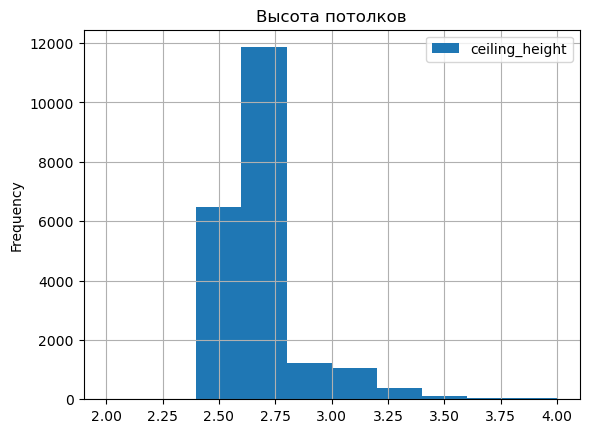

In [53]:
good_data['ceiling_height'].plot(kind='hist', grid=True, legend=True)
plt.title('Высота потолков')
plt.show()

Высоты потолков распределены в небольшом диапазоне, который задаётся стандартами и санитарными нормами, поэтому трёхметровые потолки редко встречаются в объявлениях.

#### Этаж квартиры <a id='floor'></a>

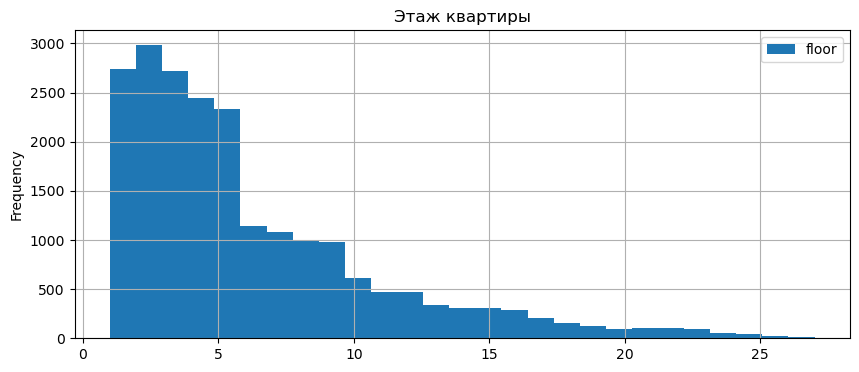

In [54]:
good_data['floor'].plot(kind='hist', grid=True, legend=True, bins=27, figsize=(10, 4))
plt.title('Этаж квартиры')
plt.show()

Чем ниже этаж объекта, тем чаще он встречается. На графике прослеживается ступенчатая структура, связанная с типовой застройкой советских времён, в которой доминировали пятиэтажные и девятиэтажные здания.

#### Тип этажа квартиры  <a id='floor_type'></a>

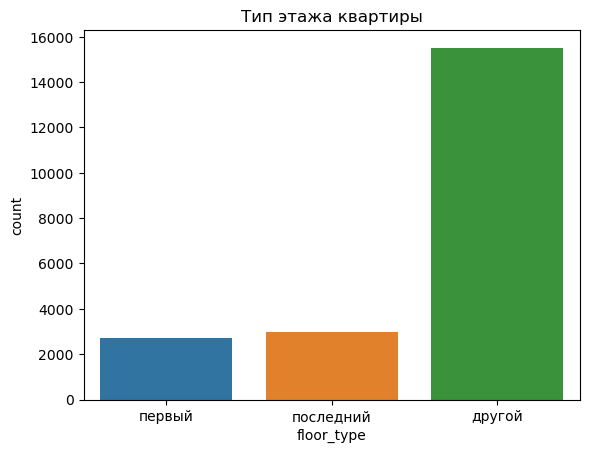

In [55]:
floors = good_data.pivot_table(index='floor_type', values='floor', aggfunc=['count'])
floors.reset_index(inplace=True)
floors.columns = ['floor_type', 'count']
floors = floors.sort_values(by='count')
sns.barplot(x=floors['floor_type'], y=floors['count'])
plt.title('Тип этажа квартиры')
plt.show()


Поскольку первых и последних этажей меньше чем прочих, то и в объявлениях они встречаются значительно реже, при этом количество первых и последних этажей в выборке имеет похожее значение, без предпочтений продавцов к одному из этих типов.

#### Общее количество этажей в доме <a id='total_floors'></a>

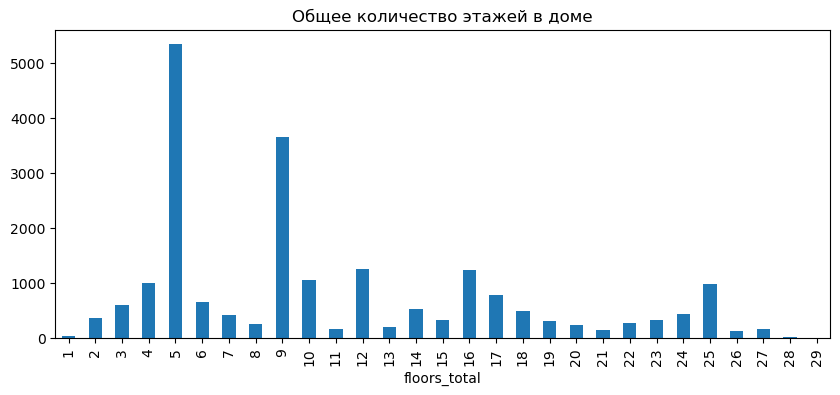

In [56]:
good_data.groupby('floors_total')['last_price'].count().plot(kind='bar', figsize=(10, 4))
plt.title('Общее количество этажей в доме')
plt.show()

По общему количеству этажей также прослеживается влияние стандартных планировок с пятью и девятью этажами, но суммарная доля современных зданий, с количеством этажей больше шестнадцати уже составляет значительный процент.

#### Расстояние до центра города в метрах <a id='distance'></a>

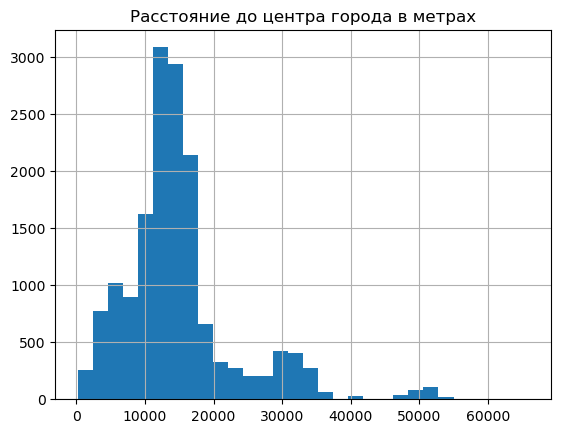

In [57]:
good_data['cityCenters_nearest'].hist(bins=30)
plt.title('Расстояние до центра города в метрах')
plt.show()

По расстоянию до центра города наблюдаются три сектора:
    * до десяти километров - центр города и старая застройка. Небольшая площадь, малоэтажные здания и застроенные территории ограничивают здесь активность в сфере недвижимости.
    * от десяти до двадцати километров - спальные районы. Здесь наличие старого жилого фонда, и активное строительство современных зданий, существенно оживляют активность на рынке, плюс большая площадь территории позволяет продавцам разнообразить предложение объектов.
    * более двадцати километров - периферийный регион с городами-спутниками и застройкой новых территорий, прилегающих к городу. Характеризуется стабильным уровнем предложений, учитыва особенности доступа к городской инфраструктуре.

#### Расстояние до ближайшего аэропорта <a id='airport_distance'></a>

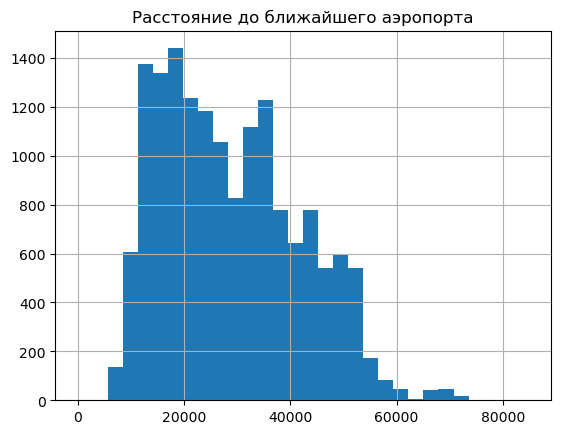

In [58]:
good_data['airports_nearest'].hist(bins=30)
plt.title('Расстояние до ближайшего аэропорта')
plt.show()

Аэропорт находится рядом с городом, поэтому чаще встречаются объекты на расстоянии до двадцати километров от него. После двадцати километров количество объявлений начинает снижаться пропорционально расстоянию.

#### Расстояние до ближайшего парка <a id='park_distance'></a>

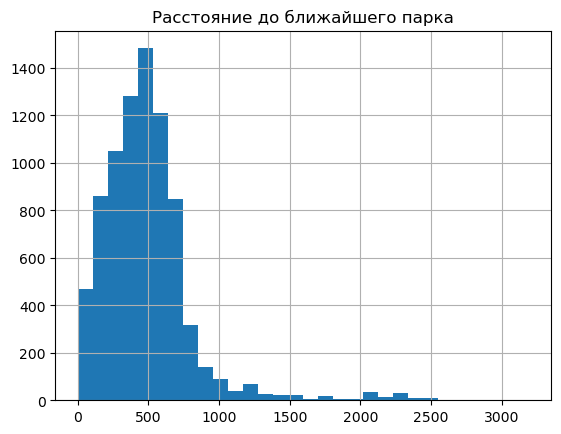

In [59]:
data['parks_nearest'].hist(bins=30)
plt.title('Расстояние до ближайшего парка')
plt.show()

В планировке города достаточно часто встречаются парки, и, как следствие, выборка показывает, что чаще всего в пятистах метрах от объекта находится парк.

#### День публикации объявления <a id='weekday'></a>

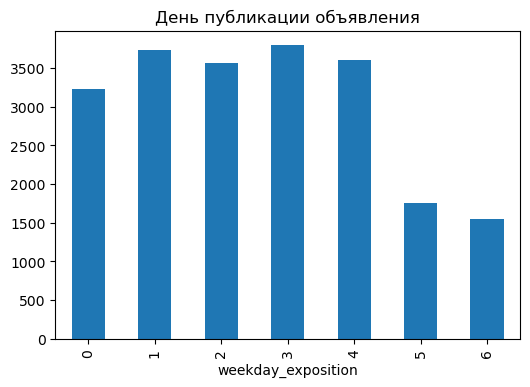

In [60]:
good_data.groupby('weekday_exposition')['last_price'].count().plot(kind='bar', figsize=(6, 4))
plt.title('День публикации объявления')
plt.show()

Количество подаваемых объявлений равномерно распределено по рабочим дням недели, на выходных же наблюдается пятидесятипроцентный спад активности на рынке.

#### Месяц публикации объявления <a id='month'></a>

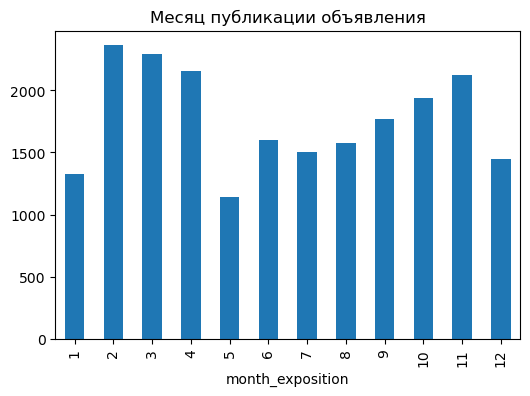

In [61]:
good_data.groupby('month_exposition')['last_price'].count().plot(kind='bar', figsize=(6, 4))
plt.title('Месяц публикации объявления')
plt.show()

По месяцам повышение активности над средним уровнем наблюдается в конце зимы - начале весны и осенью. В зимние и майские праздники наблюдается минимальная активность

#### Сроки продажи квартир <a id='days'></a>

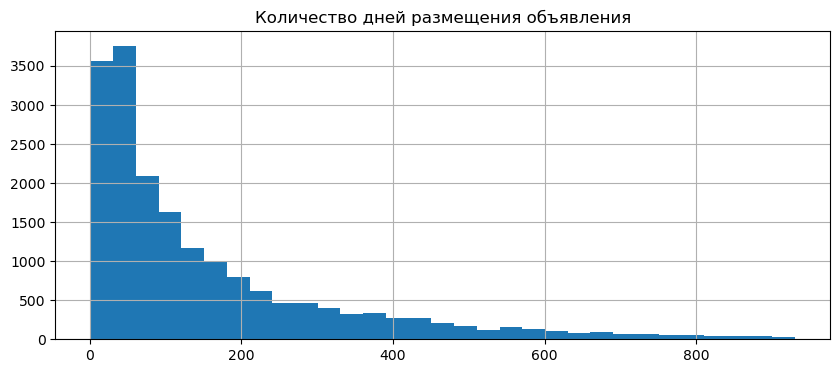

In [62]:
good_data['days_exposition'].hist(bins=31, range=(1, 930), figsize=(10, 4))
plt.title('Количество дней размещения объявления')
plt.show()

Рассмотрим подробннее участок графика, на котором находится пик значений

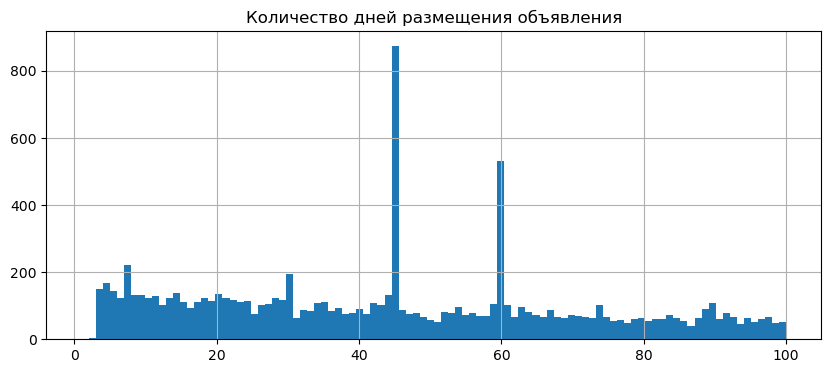

In [63]:
good_data['days_exposition'].hist(bins=100, range=(1, 100), figsize=(10, 4))
plt.title('Количество дней размещения объявления')
plt.show()

In [64]:
good_data['days_exposition'].describe()

count    18608.000000
mean       158.306105
std        175.868713
min          1.000000
25%         43.000000
50%         90.000000
75%        210.000000
max        928.000000
Name: days_exposition, dtype: float64

Обычно время продажы составляет три месяца, продажу за время меньше чем полтора месяца можно считать быстрой, необычно долгие продажи длятся более шести месяцев. Среднее время продажи составляет пять месяцев и отличается от медианного из-за большого количества объявлений, которые висят больше года и вносят искажение в статистику. `В выборке наблюдается два пика значений: 45 и 60 дней, такая выраженность пиков говорит о их технической природе, похоже, в эти дни удаляются объявления, у которых истёк срок публикации.`

#### Зависимость цены от общей площади <a id='price_to_area'></a>

Коэффициент корреляции стоимости объекта и общей площади: 0.8498666559639294


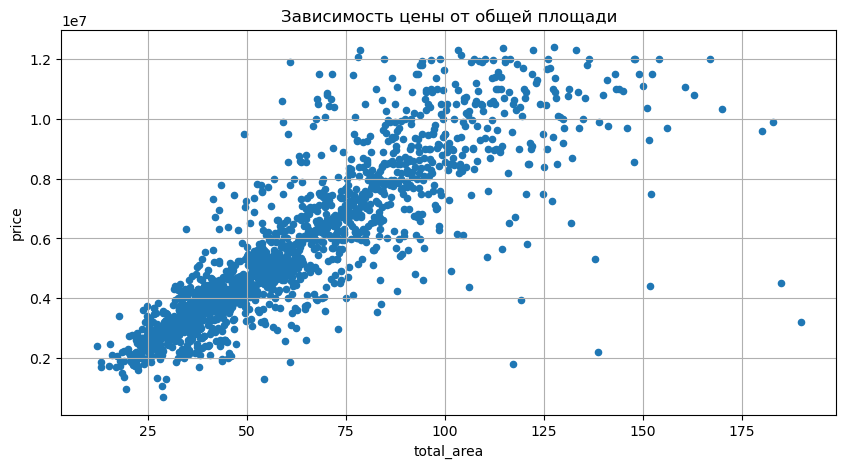

In [65]:
price_to_area = good_data.pivot_table(index='total_area', values='last_price', aggfunc='median')
price_to_area.reset_index(inplace=True)
price_to_area.columns = ['total_area', 'price']
print('Коэффициент корреляции стоимости объекта и общей площади:', \
        price_to_area['total_area'].corr(price_to_area['price']))
price_to_area.plot(x='total_area', y='price', kind='scatter', \
        title='Зависимость цены от общей площади', figsize=(10, 5), sharex=False, grid=True);

С ростом общей площади цена объекта возрастает, влияние фактора площади на цену значительное.

#### Зависимость цены от жилой площади <a id='price_to_living_area'></a>

Коэффициент корреляции стоимости объекта и жилой площади: 0.7723161767215869


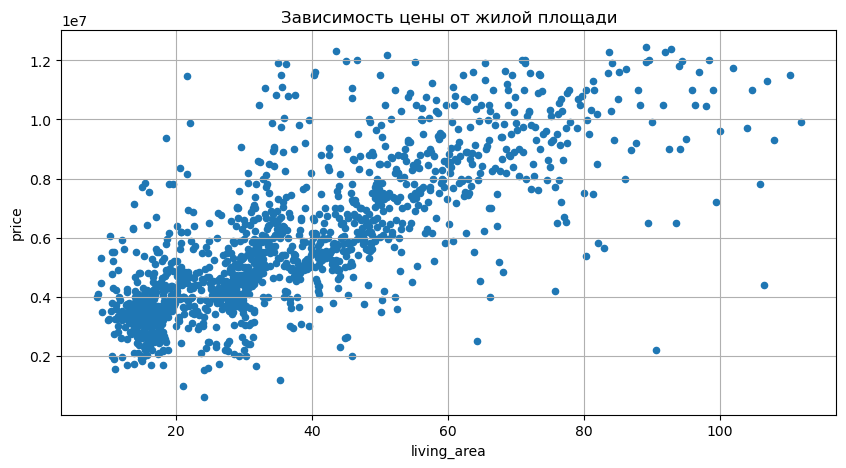

In [66]:
price_to_living_area = good_data.pivot_table(index='living_area', values='last_price', aggfunc='median')
price_to_living_area.reset_index(inplace=True)
price_to_living_area.columns = ['living_area', 'price']
print('Коэффициент корреляции стоимости объекта и жилой площади:', \
      price_to_living_area['living_area'].corr(price_to_living_area['price']))
price_to_living_area.plot(x='living_area', y='price', kind='scatter', \
        title='Зависимость цены от жилой площади', figsize=(10, 5), sharex=False, grid=True);

Величина жилой площади также оказывает влияние на цену объекта: с ростом площади цена возрастает.

#### Зависимость цены от площади кухни <a id='price_to_kitchen'></a>

Коэффициент корреляции стоимости объекта и площади кухни: 0.5720969397617629


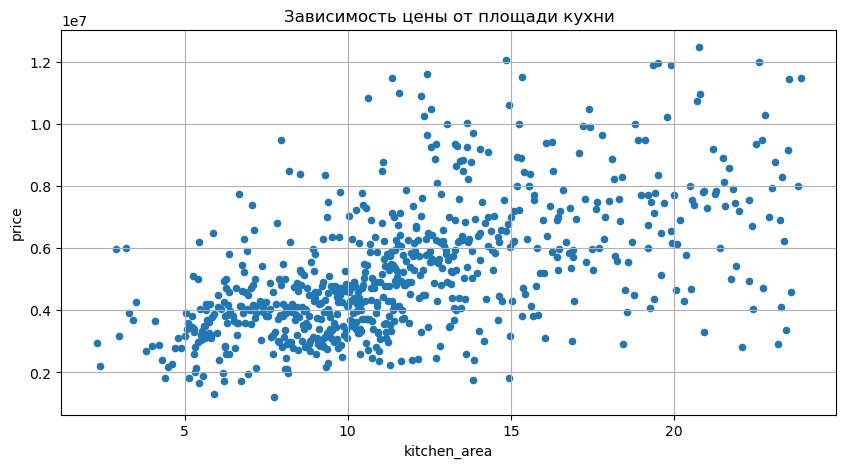

In [67]:
price_to_kitchen_area = good_data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
price_to_kitchen_area.reset_index(inplace=True)
price_to_kitchen_area.columns = ['kitchen_area', 'price']
print('Коэффициент корреляции стоимости объекта и площади кухни:', \
      price_to_kitchen_area['kitchen_area'].corr(price_to_kitchen_area['price']))
price_to_kitchen_area.plot(x='kitchen_area', y='price', kind='scatter', \
        title='Зависимость цены от площади кухни', figsize=(10, 5), sharex=False, grid=True);

Влияние площади кухни на общую стоимость прослеживается, но оно меньше, чем влияние общей и жилой площади. С ростом площади кухни цена объекта растёт незначительно и, скорее всего, определяется под влиянием каких-то сторонних факторов.

#### Зависимость цены от количества комнат <a id='price_to_rooms'></a>

Коэффициент корреляции стоимости объекта и количества комнат: 0.9936262273853068


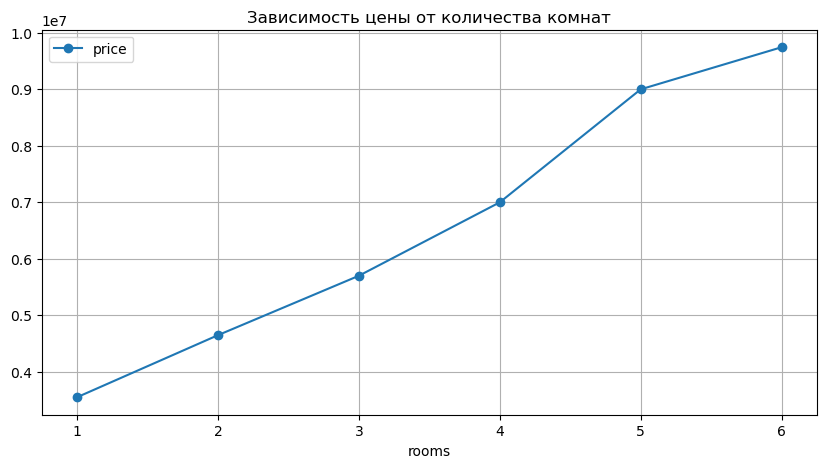

In [68]:
price_to_rooms = good_data.pivot_table(index='rooms', values='last_price', aggfunc='median')
price_to_rooms.reset_index(inplace=True)
price_to_rooms.columns = ['rooms', 'price']
print('Коэффициент корреляции стоимости объекта и количества комнат:', \
      price_to_rooms['rooms'].corr(price_to_rooms['price']))
price_to_rooms.plot(x='rooms', y='price', style='o-', \
        title='Зависимость цены от количества комнат', figsize=(10, 5), sharex=False, grid=True);

Стоимость объекта имеет практически прямую зависимость от количества комнат, чем больше комнат, тем цена выше. Этот фактор влияет на цену сильнее чем предыдущие.

#### Зависимость цены от типа этажа <a id='price_to_floor'></a>

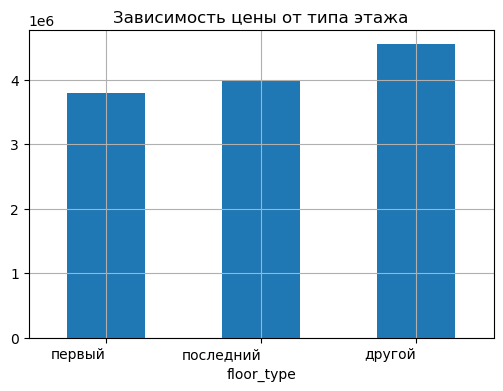

In [69]:
price_to_floor = good_data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
price_to_floor.reset_index(inplace=True)
price_to_floor.columns = ['floor_type', 'price']
price_to_floor.sort_values(by='price').plot(x='floor_type', y='price', kind='bar', \
        title='Зависимость цены от типа этажа', figsize=(6, 4), grid=True, legend=False)
plt.xticks(rotation=0, ha='right');

Тип этажа квартиры оказывает влияние на общую стоимость: квартиры, не относящиеся к крайним этажам, в среднем на десять процентов дороже. Разница в среденей цене между первым этажом и последним меньше, но всё же первый этаж в среднем немного дешевле последнего.

#### Зависимость цены от дня недели <a id='price_to_weekday'></a>

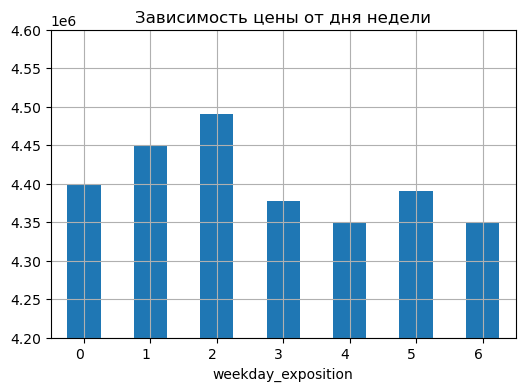

In [70]:
price_to_weekday = good_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
price_to_weekday.reset_index(inplace=True)
price_to_weekday.columns = ['weekday_exposition', 'price']
price_to_weekday.plot(x='weekday_exposition', y='price', kind='bar', ylim=(4200000, 4600000), \
        title='Зависимость цены от дня недели', figsize=(6, 4), grid=True, legend=False)
plt.xticks(rotation=0, ha='right');

График показывает уменьшение стоимости объекта ближе к концу недели, зависимость присутствует и определяет максимальную разницу в стоимости по дням недели около 2%.

#### Зависимость цены от месяца размещения <a id='price_to_month'></a>

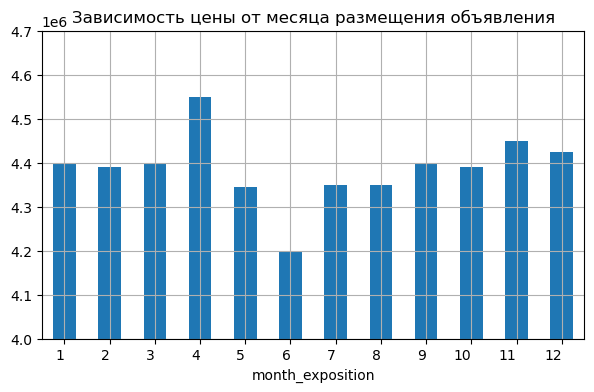

In [71]:
price_to_month = good_data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
price_to_month.reset_index(inplace=True)
price_to_month.columns = ['month_exposition', 'price']
price_to_month.plot(x='month_exposition', y='price', ylim=(4000000, 4700000), kind='bar', \
        title='Зависимость цены от месяца размещения объявления', figsize=(7, 4), grid=True, legend=False)
plt.xticks(rotation=0, ha='right');

Зависимость цены объекта и месяца размещения не прослеживается, но график показывает повышение средней стоимости в апреле и падение в июне, разница между этими отклонениями составляет около 6%. В остальное время значения стоимости близки к среднему уровню.

#### Зависимость цены от года размещения <a id='price_to_year'></a>

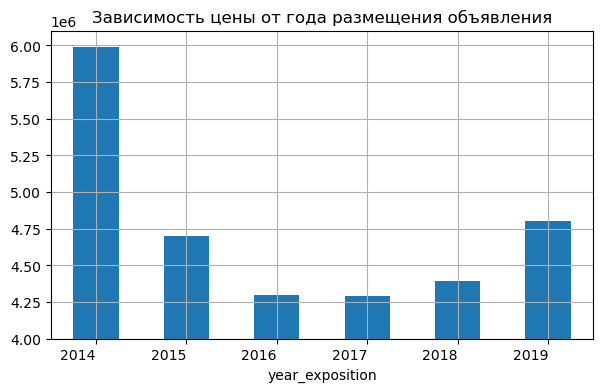

In [72]:
price_to_year = good_data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
price_to_year.reset_index(inplace=True)
price_to_year.columns = ['year_exposition', 'price']
price_to_year.plot(x='year_exposition', y='price', ylim=(4000000, 6100000), kind='bar', \
        title='Зависимость цены от года размещения объявления', figsize=(7, 4), grid=True, legend=False)
plt.xticks(rotation=0, ha='right');

График показывает слабую зависимость цены от года размещения объявления. Похоже, на таком масштабе, большее влияние на цену оказывают сторонние факторы, связанные с общим состоянием экономики и строительного сектора в частности.

#### Средняя цена в 10 населённых пунктах с самым большим числом объявлений <a id='mean_price'></a>

,locality_name,advertisement_quantity,mean_price
214,Санкт-Петербург,13487,105661.314323
196,Пушкин,326,100302.584360
104,Кудрово,455,95242.074481
166,Парголово,324,90218.912261
143,Мурино,578,86229.296662
283,Шушары,434,78693.397209
88,Колпино,332,75176.778913
43,Гатчина,298,68507.845617
35,Всеволожск,384,67007.411423


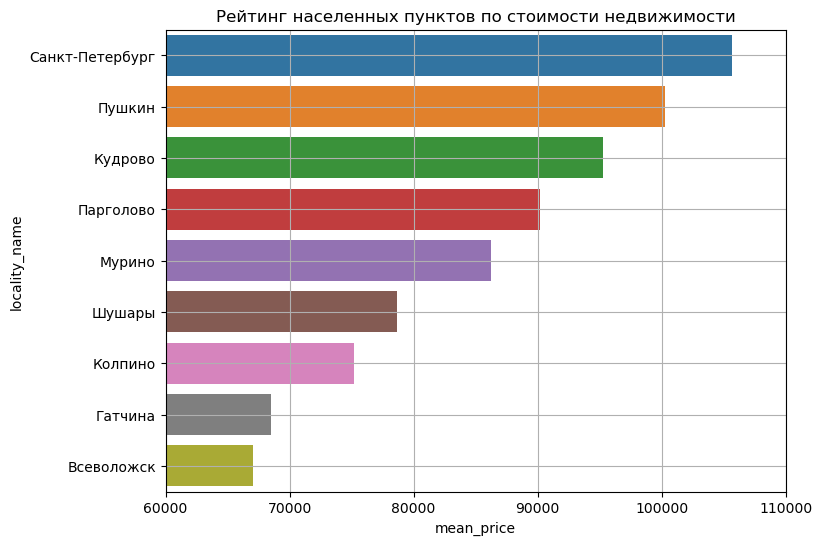

Населённые пункты с самой высокой и низкой стоимостью квадратного метра:


,locality_name,advertisement_quantity,mean_price
214,Санкт-Петербург,13487,105661.314323
35,Всеволожск,384,67007.411423


In [73]:
locality_price = good_data.pivot_table(index='locality_name', values='sqm_price', aggfunc=['count', 'mean'])
locality_price.reset_index(inplace=True)
locality_price.columns = ['locality_name', 'advertisement_quantity', 'mean_price']
locality_price = locality_price.sort_values(by='mean_price', ascending=False).query('advertisement_quantity >= 237')
display(locality_price)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=locality_price['mean_price'], y=locality_price['locality_name'], ax=ax)
ax.set_xlim(60000, 110000)
plt.title('Рейтинг населенных пунктов по стоимости недвижимости')
plt.grid()
plt.show()

print('Населённые пункты с самой высокой и низкой стоимостью квадратного метра:')
locality_price.loc[(locality_price['mean_price'] == locality_price['mean_price'].max()) | \
                    (locality_price['mean_price'] == locality_price['mean_price'].min())]


#### Средняя цена каждого километра <a id='price_to_distance'></a>

In [74]:
distance_price = (good_data.query('"Санкт-Петербург" in locality_name') \
                  .pivot_table(index='center_distance_km', values='sqm_price', aggfunc=['mean', 'count']))
distance_price.reset_index(inplace=True)
distance_price.columns = ['center_distance_km', 'mean_price', 'quantity']
distance_price

,center_distance_km,mean_price,quantity
0,0.0,111238.536316,8
1,1.0,121256.910260,103
2,2.0,115978.296257,170
3,3.0,110101.265171,234
4,4.0,113978.800719,463
5,5.0,119781.908840,568
6,6.0,122501.212387,410
7,7.0,116950.923217,283
8,8.0,115665.918778,459
9,9.0,107121.641954,516


Посмотрим как стоимость объектов зависит от расстояния до центра города

Коэффициент корреляции стоимости квадратного метра и расстояния от центра: -0.9307663805787482


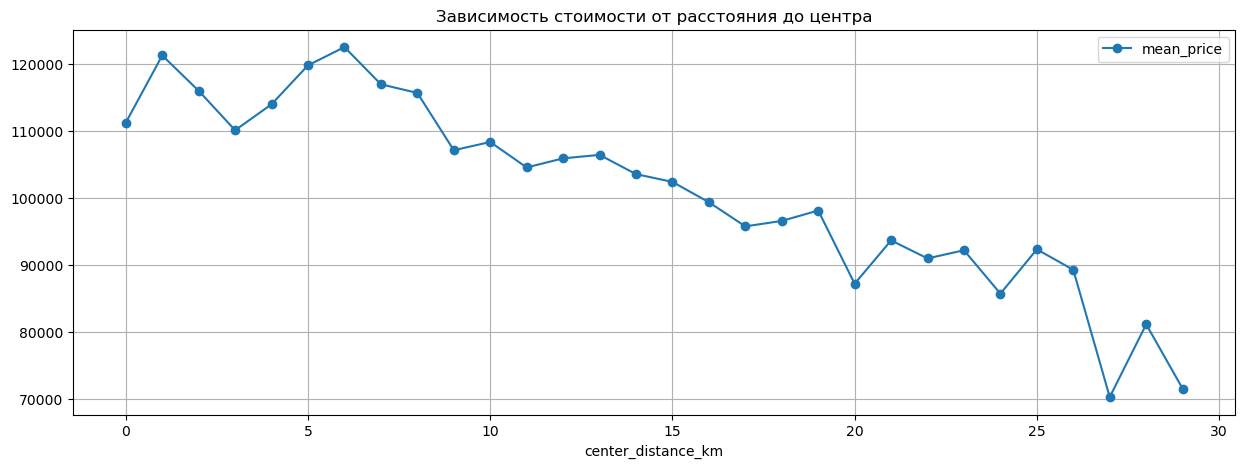

In [75]:
print('Коэффициент корреляции стоимости квадратного метра и расстояния от центра:', \
      distance_price['center_distance_km'].corr(distance_price['mean_price']))
distance_price.plot(x='center_distance_km', y='mean_price', style='o-', \
        title='Зависимость стоимости от расстояния до центра', figsize=(15, 5), sharex=False, grid=True)
plt.show()

С увеличением расстояния до центра города средняя стоимость квадратного метра недвижимости уменьшается. Прослеживается сильная корреляция с небольшими отклонениями в крайних значениях, связанными с маленькой выборкой на данных участках, но общий тренд говорит об обратной зависимости стомости и расстояния до центра города. В центральной части города стоимость не уменьшается с увеличением расстояния, а держится в пределах средних значений по центральному району. После восьмого километра центральная часть города заканчивается, и начинается уменьшение стоимости квадратного метра недвижимости с каждым километром.

#### Вывод: <a id='conclusion4'></a>
Чаще всего в выборке встречаются объекты со следующими параметрами:
* Однокомнатная или маленькая двухкомнатная квартира
* Высота потолков около 2,7м
* Площадь кухни от 6 до 10 квадратных метров
* Жилая площадь или менее 20, или около 30 квадратных метров
* Расположена в пятиэтажных, девятиэтажных зданиях, или в современной высотной застройке
* Квартира находится не выше восьмого этажа.
* Квартира не на первом, или последнем этаже
* Расстояние до центра города составляет от 10 до 16 километров
* Расстояние до аэропорта составляет 20 километров
* В радиусе 500 метров есть парк
* Стоимость от трёх до пяти миллионов

Рынок недвижимости более активен в будние дни и показывает на выходных спад активности на 50%. В течение года рынок более ативен в конце зимы – начале весны и осенью, а в зимние и майские праздники активность снижается. Обычное время продажи квартиры составляет три месяца, быстрые продажи проходят за полтора месяца, а долгие длятся более шести месяцев.


Исследование показало, что сильное влияние на общую стоимость объектов недвижимости, оказывают общая площадь, жилая площадь и количество комнат. Расположение квартиры на крайних этажах уменьшает её стоимость в среднем на 10%. В пределах двух процентов меняется цена в течение недели, уменьшаясь к выходным, а в течение года цена может меняться на 6% между апрельским максимумом и июньским минимумом, но в остальные месяцы стоимость находится в рамках средних значений. Изменение цены по годам может быть значительным, но на таком масштабе большее влияние на её формирование оказывают внешние факторы.

Из крупных населенных пунктов в регионе, средняя стоимость квадратного метра больше всего в Санкт-Петербурге, а меньше всего во Всеволожске. В зависимости от населённого пункта изменение цены может доходить до 35%, а главным фактором, оказывающим влияние на рыночную стоимости недвижимости, оказалось расстояние до центра города.

### Результаты исследования <a id='result'></a>

#### Основные этапы проделанного исследования:
* Сделав выгрузку полученного файла с данными, изучили содержащуюся информацию, объём и состав выборки, типы данных. Сделали графики, чтобы рассмотреть распределение числовых значений по категориям.

* Нашли и заполнили пропуски в значениях, там, где это было возможно и определили причины, которые могли привести к появлению пропусков. Привели типы данных в соответствие содержащейся в них информации. Устранили неявные дубликаты для названий населённых пунктов. Нашли и устранили редкие и выбивающиеся значения. 

* На следующем этапе дополнили данные столбцами с расчётными параметрами, необходимыми для дальнейшего исследования.

* В ходе исследования построили графики и изучили следующие параметры объектов: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. Исследовали, сколько времени обычно занимает продажа. Проверили влияние на стоимость объекта следующих факторов: общая площадь, жилая площадь, площадь кухни, количество комнат, этаж квартиры, дата размещения. Посчитали среднюю цену  квадратного метра недвижимости в наиболее крупных населённых пунктах. Исследовали, как стоимость объектов зависит от расстояния до центра города.

#### Данные для исследования:

Предоставленные для исследования данные обладали достаточно большой выборкой и качеством, достаточным для проведения надежного исследования. Первичный анализ показал наличие пропусков, а первичное изучение графиков числовых категорий позволило предположить наличие аномальных значений в данных.

#### Результаты подготовки данных для исследования:
В процессе предобработки были устранены выбросы, которые, чаще всего были связаны с параметрами элитного жилья, вносящими искажения в средние и медианные значения. Пропуски часто были связаны с отсутствием у продавца необходимой картографической и технической информации, а также с ошибками при вводе информации. Большую часть пропусков удалось восстановить, но пришлось оставить пропуски в картографических данных, чтобы они не внесли искажение в картину распределения объектов с большим разбросом значений. Пропуски остались и в столбце с информацией о количестве дней размещения объявления - они указывают на то, что недвижимость ещё не продана и не вносят искажения в статистику. Также из-за путаницы с обозначением типа населённого пункта, образовались неявные дубликаты в столбце с названиями населённых пунктов, которые были обнаружены и устранены. Завершением этого этапа стало преобразование данных, не предполагающих дробных значений в целочисленный формат, логические данные и данные времени также приведены в соответствующие им форматы. Данные после предобработки обладали большой выборкой и были подготовлены к дальнейшей работе.
#### Расчёт необходимых параметров:
Для проведения исследования данные были дополнены расчётными параметрами стоимости квадратного метра и расстояния до центра, категоризированы данные об этажах квартир и добавлены столбцы с параметрами времени.
#### Результаты анализа данных:
* Исследование показало, что чаще всего в выборке встречаются однокомнатные или маленькие двухкомнатные квартиры с общей площадью до 50 квадратных метров и высотой потолков около 2,7м. Площадь кухни в таких квартирах от 6 до 10 квадратных метров, а жилая площадь или менее 20, или около 30 квадратных метров. Расположена такая квартира чаще всего в пятиэтажных, девятиэтажных зданиях, или в современной высотной застройке, с количеством этажей больше 16, но сама квартира редко находится выше восьмого этажа и на крайних этажах. Наибольшее количество таких квартир располагается в десяти – шестнадцати километрах от центра города и на расстоянии коло 20 километров от аэропорта. Как правило в радиусе 500 метров от квартиры есть парк. Стоимость такого объекта будет в диапазоне от трёх до пяти миллионов.

* Исследование временных характеристик показало, что продавцы недвижимости проявляют большую активность в будние дни, а на выходных количество предложений на рынке снижается в два раза. В течение года рынок недвижимости растёт в конце зимы – начале весны и осенью, а в зимние и майские праздники наблюдается спад предложений. Обычное время продажи квартиры составляет три месяца, редко продавцам удаётся осуществить сделку быстрее, чем за полтора месяца, но и больше чем полгода, продажи длятся не часто.

* Исследование зависимости стоимости квартиры от его характеристик показало, что общая стоимость объекта недвижимости сильнее всего зависит от количества комнат. Общая площадь и жилая площадь также сильно влияют на итоговую цену. От площади кухни цена зависит мало. Объекты на крайних этажах в среднем стоят на 10% дешевле.

* Исследовав изменение цены во времени выяснили, что в течение недели стоимость квартир в объявлениях меняется в пределах двух процентов, уменьшаясь к концу недели. А в течение года держится около среднего уровня, превышая его в апреле и опускаясь ниже среднего в июне, показывая перепад в стоимости порядка 6%. Средняя цена по годам может меняться довольно значительно, но это скорее связано с внешними факторами, такими как состояние строительного сектора и экономики в целом.

* Из крупных населенных пунктов в регионе, средняя стоимость квадратного метра больше всего в Санкт-Петербурге, а меньше всего во Всеволожске. Разница в стоимости квадратного метра, в зависимости от населённого пункта в регионе, может меняться значительно, доходя до 35%. Больше всего влияние на рыночную стоимость недвижимости, оказывает расстояние до центра города: с увеличением расстояния до центра города средняя стоимость квадратного метра недвижимости уменьшается.

#### Вывод:
Самыми распространёнными на рынке являются небольшие квартиры в спальных районах с ценой около 4 миллионов, из-за их ценовой доступности и инвестиционной привлекательности. Активность участников рынка хоть и не стабильна, но изменяется прогнозируемо, и к всплескам активности можно подготовиться. Изменение цены в масштабах недели и года, также имеет особенности, которые необходимо учитывать при работе с недвижимостью. Главным фактором, влияющим на рыночную стоимость недвижимости, является расстояние до центра города, находя отклонения в этом параметре, можно отслеживать мошенническую деятельность на рынке недвижимости.